In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [6]:
df_tk = pd.read_csv('tokyodistrict.csv')

In [7]:
df_tk.head(10)

,No.,Flag,Name,Kanji,Population(as of October 2016),Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,"0059,441","05,100",11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,"0147,620","14,460",10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,"0248,071","12,180",20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,"0339,211","18,620",18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,"0223,389","19,790",11.29,"Hongō, Yayoi, Hakusan"
5,06,NaN,Taitō,台東区,"0200,486","19,830",10.11,"Ueno, Asakusa"
6,07,NaN,Sumida,墨田区,"0260,358","18,910",13.77,"Kinshichō, Morishita, Ryōgoku"
7,08,NaN,Kōtō,江東区,"0502,579","12,510",40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,..."
8,09,NaN,Shinagawa,品川区,"0392,492","17,180",22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,..."
9,10,NaN,Meguro,目黒区,"0280,283","19,110",14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai"


In [8]:
df_tk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
No.                               24 non-null object
Flag                              1 non-null object
Name                              24 non-null object
Kanji                             24 non-null object
Population(as of October 2016)    24 non-null object
Density(/km2)                     24 non-null object
Area(km2)                         24 non-null float64
Major districts                   23 non-null object
dtypes: float64(1), object(7)
memory usage: 1.6+ KB


In [9]:
df_tk.drop(['No.','Flag','Major districts'],inplace=True,axis=1)

In [10]:
df_tk.head()

,Name,Kanji,Population(as of October 2016),Density(/km2),Area(km2)
0,Chiyoda,千代田区,"0059,441","05,100",11.66
1,Chūō,中央区,"0147,620","14,460",10.21
2,Minato,港区,"0248,071","12,180",20.37
3,Shinjuku,新宿区,"0339,211","18,620",18.22
4,Bunkyō,文京区,"0223,389","19,790",11.29


In [11]:
df_tk.columns = ['Name','Japanese name','Population','Density','Area']

In [12]:
df_tk

,Name,Japanese name,Population,Density,Area
0,Chiyoda,千代田区,"0059,441","05,100",11.66
1,Chūō,中央区,"0147,620","14,460",10.21
2,Minato,港区,"0248,071","12,180",20.37
3,Shinjuku,新宿区,"0339,211","18,620",18.22
4,Bunkyō,文京区,"0223,389","19,790",11.29
5,Taitō,台東区,"0200,486","19,830",10.11
6,Sumida,墨田区,"0260,358","18,910",13.77
7,Kōtō,江東区,"0502,579","12,510",40.16
8,Shinagawa,品川区,"0392,492","17,180",22.84
9,Meguro,目黒区,"0280,283","19,110",14.67


In [13]:
df_tk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
Name             24 non-null object
Japanese name    24 non-null object
Population       24 non-null object
Density          24 non-null object
Area             24 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.0+ KB


In [14]:
df_tk['Name'] = df_tk['Name'].astype(str)

In [15]:
df_tk.set_index('Name',inplace=True)

In [16]:
pop_str = [str.replace(',','') for str in df_tk['Population'].astype(str)]

In [17]:
pop = [int(i) for i in pop_str]

In [18]:
df_tk['Population'] = pop

In [19]:
density_str = [str.replace(',','.') for str in df_tk['Density'].astype(str)]
den = [float(i) for i in density_str]
df_tk['Density'] = den

In [20]:
df_tk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Chiyoda to Overall
Data columns (total 4 columns):
Japanese name    24 non-null object
Population       24 non-null int64
Density          24 non-null float64
Area             24 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 960.0+ bytes


In [21]:
df_pop = df_tk.iloc[1:23,[1]]

In [25]:
df_pop.sort_values(by=['Population'], ascending=False)

,Population
Name,
Setagaya,910868
Nerima,726748
Ōta,722608
Edogawa,685899
Adachi,674067
Suginami,570483
Itabashi,569225
Kōtō,502579
Katsushika,447140


Text(0.5, 0, 'District name')

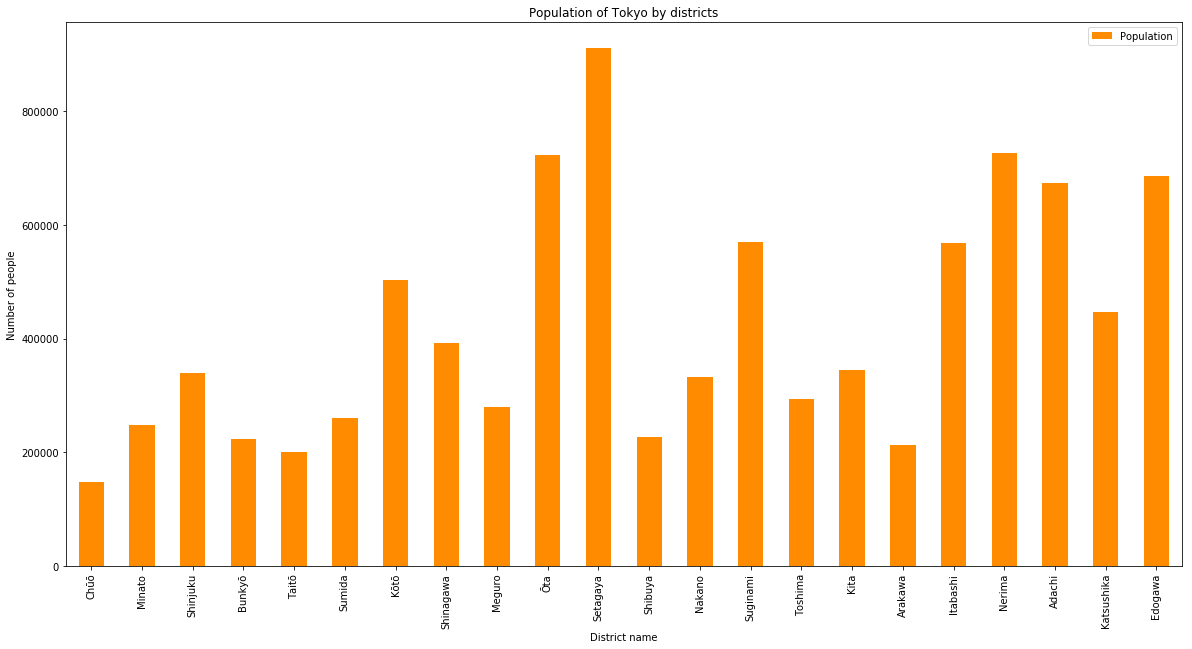

In [26]:
popplt = df_pop.plot(kind='bar',
            figsize = (20,10),color='darkorange')
popplt.set_title('Population of Tokyo by districts')
popplt.set_ylabel('Number of people')
popplt.set_xlabel('District name')

In [27]:
import folium

In [28]:
tk_map=folium.Map(location=[35.652832, 139.839478], zoom_start=10)

In [29]:
tk_map

In [30]:
import json
with open('tokyo.geo.json','r') as file:
    str = file.readlines()
    tokyo = json.loads(str[0])

In [31]:
tokyo

{'type': 'Feature',
 'properties': {'name': 'Tokyo'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[139.02390376425873, 35.89737619169328],
     [139.0501252234181, 35.878693419407576],
     [139.0624156969384, 35.87340326144389],
     [139.07054842331848, 35.87150250855145],
     [139.08253483634618, 35.874870619301554],
     [139.10023346879152, 35.86710664731223],
     [139.1473802381467, 35.86271938369693],
     [139.1594885146887, 35.857135136049756],
     [139.16341177301763, 35.850885817878556],
     [139.19360890033792, 35.84018037469801],
     [139.20331283770403, 35.84128063218975],
     [139.20524840363302, 35.84508026588027],
     [139.21484817474314, 35.84593936303749],
     [139.23234644934374, 35.836606493170535],
     [139.23902971691564, 35.840564621543415],
     [139.2425710464783, 35.83676512613713],
     [139.26136228175318, 35.83654195870145],
     [139.28040512115894, 35.84061519961704],
     [139.28496199280943, 35.836006446678496],
     [139.2909508

In [32]:
tk_map.choropleth(
    geo_data=tokyo
)

In [33]:
tk_map

In [34]:
import json
with open('tokyo-sw.geo.json','r') as file:
    str = file.readlines()
    tokyo_sw = json.loads(str[0])

In [35]:
tokyo_sw

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'city_code': '13121',
    'name': 'Adachi',
    'state_name': 'Tokyo',
    'state_name_jp': '東京都',
    'station_name_jp': None,
    'county_name_jp': None,
    'city_name_jp': None,
    'distric_name_jp': '足立区',
    'population': 684063,
    'num_households': 315060},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[139.7773037500001, 35.81075058300007],
      [139.77867350000008, 35.808774500000084],
      [139.77923, 35.808249],
      [139.78131150000002, 35.807188],
      [139.7839560000001, 35.806899],
      [139.785817, 35.806899],
      [139.7865, 35.806921],
      [139.7875082500001, 35.806801750000034],
      [139.788698, 35.806417],
      [139.78999250000004, 35.80597350000005],
      [139.79083850000006, 35.805729],
      [139.79164350000008, 35.80546050000004],
      [139.79256, 35.805283],
      [139.7939970000001, 35.805199],
      [139.7953490000001, 35.805344],
      [139.798836, 35

In [36]:
df_pop.reset_index(level=0, inplace=True)

In [37]:
df_pop.sort_values(by=["Population"],ascending=False)

,Name,Population
10,Setagaya,910868
18,Nerima,726748
9,Ōta,722608
21,Edogawa,685899
19,Adachi,674067
13,Suginami,570483
17,Itabashi,569225
6,Kōtō,502579
20,Katsushika,447140
7,Shinagawa,392492


In [62]:
tk_map.choropleth(
    geo_data=tokyo_sw,
    data=df_pop,
    columns=['Name','Population'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population of Tokyo'
)

In [63]:
tk_map